In [88]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from ipywidgets import interact
from IPython.display import HTML

%matplotlib inline
%config InlineBackend.figure_formats = {'svg',}

'''
This little snippet of HTML ensures that code areas can be hidden.
'''
HTML('''<script>
code_show=true; 
function code_toggle() {
if (code_show){
$('div.input').hide();
} else {
$('div.input').show();
}
code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="This documment is written in a Jupyter notebook and the code used to produce these analyses has been hidden for ease of reading.  
To make the code visiable click here"></form>''')

# Good news about death, maybe?

We are looking at data on mortality from France. The data are from the [Human Mortality Database](http://mortality.org/ "Title") and from the [International Database on Longevity](http://www.supercentenarians.org/).

These data were used in a paper entitled "Evidence for a limit to human lifespan" in which the authors argue that the results the present "strongly suggest that the maximum lifespan of humans is fixed and subject to natural constraints". This is a rather provocative statement and one which I do not believe is warranted given their analysis. The statistical techniques used in the paper are relatively simple, they're taught in undergraduate labs, and consequently, the results presented in the paper are relatively easy to replicate.

In the paper, data from two different sources are analysed. The first is from the [Human Mortality Database](http://mortality.org/ "Title") which has information on longevity gathered from a number of countries. The second is the [International Database on Longevity](http://www.supercentenarians.org/) which contains information on the ages at death of "supercentenarians", those who survive past their 110th birthday. I cannot provide the data from these sources along with this notebook because the data is provided on the understanding that it will not be passed along. However, it is quick and simple to register to obtain the data.

I'm going to look at the HMD data from France first, focusing initially on data on female mortality. The statistic we will be looking at initially is "survivors per 100,000 people at age X".


In [89]:
class lifetable:
 
    def __init__(self):
        self.data = np.zeros((2014-1816+1, 111))
        self.years = np.zeros(2014-1816+1)
        self.minyear = 9999
        self.maxyear = -9999
        self.colour = "dodgerblue"
        
    def add_value(self, year, age, number):
        self.data[year-1816,age] = number
        self.years[year-1816] = year
        if year > self.maxyear: self.maxyear = year
        if year < self.minyear: self.minyear = year

    def switchcolour(self):
        if self.colour == "dodgerblue":
            self.colour = "red"
        else:
            self.colour = "dodgerblue"
    
    def plot_data(self, age, ystart=1816):
        
        y1 = ystart
        if y1 < self.minyear: y1 = self.minyear
        y2 = 2014
        if y2 > self.maxyear: y2 = self.maxyear
        
        x = self.years[y1-1816:y2-1816+1]
        y = self.data[y1-1816:y2-1816+1,age]
        plt.plot(x, y, color=self.colour)
        plt.text(y2+1,lt.data[y2-1816,age], str(age), color=self.colour)
        
        return
    
    def calc_trend(self, age, ystart, yend):
        x  = self.years[ystart-1816:yend-1816+1]
        y1 = self.data[ystart-1816:yend-1816+1, age]
        if min(y1) <= 0: return np.nan, np.nan
        y = np.log10(y1)
        slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
        return slope, intercept
    
    def plot_log_trend(self, age, ystart, yend):
        
        y1 = ystart
        if y1 < self.minyear: y1 = self.minyear
        y2 = yend
        if y2 > self.maxyear: y2 = self.maxyear
        
        slope, intercept = self.calc_trend(age, y1, y2)
        if slope != np.nan:
            x  = self.years[y1-1816:y2-1816+1]
            plt.plot(x, x*slope+intercept, color=self.colour)
    
        return
    
    def plot_log_data(self, age, ystart=1816):
        
        y1 = ystart
        if y1 < self.minyear: y1 = self.minyear
        y2 = 2014
        if y2 > self.maxyear: y2 = self.maxyear
        
        x  = self.years[y1-1816:y2-1816+1]
        y1 = self.data[y1-1816:y2-1816+1,age]
       
        y = y1*1
        
        for i, val in enumerate(y1):
            if val > 0:
                y[i] = np.log10(val)
            else:
                y[i] = np.nan
    
        plt.plot(x, y, color=self.colour)  
        plt.text(self.maxyear+1,
                 np.log10(self.data[self.maxyear-1816,age]),
                 str(age),
                 color=self.colour)
        
        return
   
    
def read_lifetable(infile):

    f = open(infile,'r')
    f.readline()
    f.readline()
    f.readline()

    lt = lifetable()
    
    for line in f:
        year = int(line[2:6])
        age = int(line[15:18])
        number = float(line[47:53])
        
        lt.add_value(year, age, number)
   
    return lt

In [90]:
ystart = 1975
lt = read_lifetable('fltper_1x1.txt')
col = "dodgerblue"
slopes = []

The plot below shows survivors per 100,000 people at age X from 1900 to 2014 when the data set ends. You can use the slider above the plot to see how that varies with age. You can clearly see big drops in survival around the first and second world war, the former being exacerbated by the flu pandemic. You can also see the huge variability in survival between ages. The vertical scale on the diagram adapts itself so keep an eye on the maximum value as you scan through the data. At an age of 110, the series maxes out at around 20 survivors per 100,000, for vastly less advanced ages, it typically maxes out close to 100,000 because people rarely die young.

There's one weird things in the data: if you drag the slider up around the 100 year mark, you'll see that there was a kind of minimum in survivors/100,000k in the late nineteenth century. The first half of the 1800s was apparently a relatively good time to be a centenarian, that is until the latter half of the 20th century.

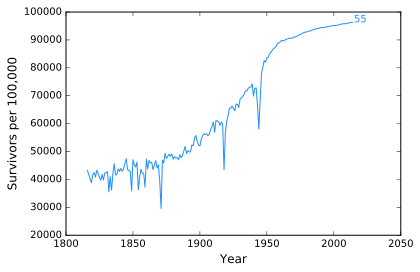

<function __main__.plot_raw_data>

In [91]:
def plot_raw_data(age):
    lt.plot_data(age)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Survivors per 100,000', fontsize=12)
    plt.show()

interact(plot_raw_data,age=(1,110))

Because of the great variation in survival rates with age and time, it is not easy to compare one age with another quite different age, or one time period with a much earlier one, so we're going to take logarithms of the data to compress everything into a more manageable space. Taking logarithms also has the effect of changing an exponential increase with time into something more linear. In the plot below, the slider allows you to change the age and the checkbox lets you toggle a "linear fit" to the data on and off.

One thing to note with the logarithm is that the logarithm of zero is minus infinity. The data in the file are whole numbers so the fewest survivors per 100,000 you can have is one. For more advanced ages, there are fewer than 1 survivors per 100,000 people, so few that zero is a better approximation of the number. Consequently, when I take the logarithms of the data there are some infinities but I don't show the infinities on the plot. Instead, there's a gap in the data trace where the infinities should be and I don't compute or show the linear fit for those ages.

The linear fits aren't really a great description of the data, they don't capture, except in the most approximate sense, the long term change in the data.

The weirdness in the data is more obvious after logarithms are taken. From around the age of 92 upward, it looks like survivors/100k decreased at first and then increased. How plausible this is, I can't really gauge, but it's worth noting.

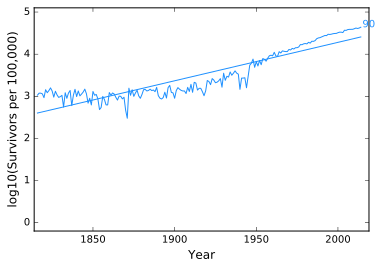

<function __main__.f>

In [92]:
def f(age, add_linear_fit):
    lt.colour="dodgerblue"
    lt.plot_log_data(age, 1816)
    if add_linear_fit: lt.plot_log_trend(age, 1816, 2014)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('log10(Survivors per 100,000)', fontsize=12)
    plt.axis((lt.minyear-2,lt.maxyear+5,-0.2,5.1))
    plt.show()
    
interact(f,age=(70,110,1),add_linear_fit=True)

In the paper,the first figure shows the linear fits stacked up one on top of the other from 1900 to the present. It's not clear how the linear fits were computed for those ages where there were zero survivors per 100,000 in some years. There are, of course, various ways that one could deal with this - ignore those year, assign a value to them, etc - but I prefer not to guess so I've simply omitted the linear fit for those ages where we have no data. The plot below shows the logarithms of the numbers of survivors per 100,000 people at age X (for all Xs 70 and above) from the chosen year to 2014. You can slide the start year back and fore and toggle the data on and off, the better to see the linear fits.

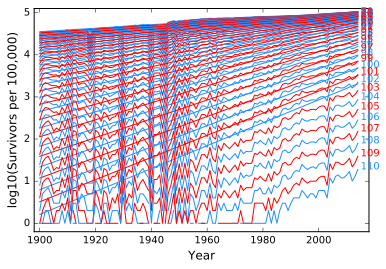

<function __main__.plot_log_data>

In [93]:
def plot_log_data(ystart=1900, showdata=True):
    lt.colour = "dodgerblue"
    for age in range(70,111):
        if showdata: lt.plot_log_data(age, ystart)
        lt.plot_log_trend(age, ystart, 2014)
        lt.switchcolour()

    plt.xlabel('Year', fontsize=12)
    plt.ylabel('log10(Survivors per 100,000)', fontsize=12)
    plt.axis((ystart-2,2018,-0.2,5.1))
    plt.show()

interact(plot_log_data,ystart=(1816,1990,1), showdata=True)

The general pattern in the linear fits to the data is that slope of the lines increases with increasing age. If you start the lines off in 1900, then that pattern holds up to the age of 102. If you slide the slider over to 1972, then you get all the lines up to and including 110+, the highest age in the data set. The pattern still holds. It's not easy to compare the gradients of nearly parallel lines. They make my eyes go funny. The next plot in the paper helps with that.

This plot shows the gradient of the lines for each age. The gradients are calculate from 1900 to the year shown on the slider.

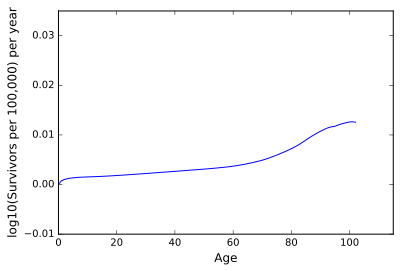

<function __main__.plot_gradient_as_function_of_age>

In [94]:
def plot_gradient_as_function_of_age(yend):
    slopes = []
    for age in range(0,111):
        y1 = yend-99
        if y1 < lt.minyear: y1 = lt.minyear
        slope, intercept = lt.calc_trend(age, y1, yend)
        slopes.append(slope)

    plt.plot(range(0,111),slopes)
    plt.xlabel('Age', fontsize=12)
    plt.ylabel('log10(Survivors per 100,000) per year', fontsize=12)
    plt.axis((0,115,-0.01,0.035))
    plt.show()

interact(plot_gradient_as_function_of_age, yend=(1920,2014,1))

What you can see if you play around with the slider is that there's a kind of a peak in the slopes corresponding the age for which survivors/100k increased most rapidly over the preceding 100 years. As time moves on, the peak moves to progressively higher ages until, in the late 1970s, it's scooched all the way over to the right hand side and an age of maximum increase of 102 years. This is the highest age for which we have complete non-zero data so it's kind of trapped there.

If you move the slider to around 1959, the you can see an interesting double peak start to form, if you then slowly advance the slider you see that around 1962, the older peak overtakes the younger one and there's a sudden "jump" in the age of maximum increase. I'm not sure what exactly causes it.

The next plot in the paper summarised this by showing the age at which the maximum increase occurred for different end years and that's what appears next.

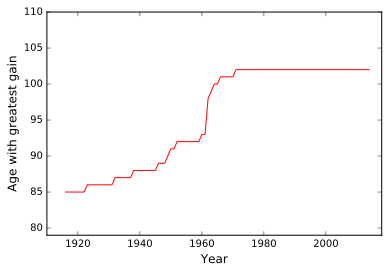

In [95]:
col = "dodgerblue"

def fig1d(inlt):
    max_by_year = []
    
    range0 = 1916
    if range0 < inlt.minyear: range0 = inlt.minyear + 2
    range1 = 2014
    if range1 > inlt.maxyear: range1 = inlt.maxyear
    
    for yend in range(range0,range1+1):
        slopes = []
        for age in range(0,111):
            y1 = yend-99
            if y1 < inlt.minyear: y1 = inlt.minyear
            slope, intercept = inlt.calc_trend(age, y1, yend)
            slopes.append(slope)

        max_value = max(slopes)
        max_index = slopes.index(max_value)
        max_by_year.append(max_index)    
        
    plt.plot(range(range0,range1+1),max_by_year,color=inlt.colour)

    
fig1d(lt)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Age with greatest gain', fontsize=12)
plt.axis((1910,2018,79,110))
plt.show()


Finally, we have got to the end of the first figure in the paper and most of the features are there. We can now add in the data for men as well.

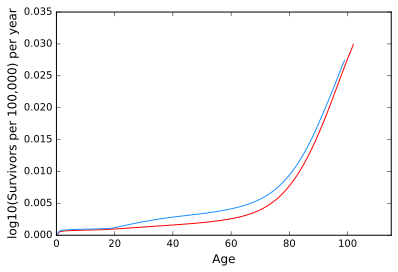

In [96]:
mlt = read_lifetable('mltper_1x1.txt')
mlt.colour = "dodgerblue"
lt.colour = "red"

def fig1c(inlt):
    
    slopes = []
    for age in range(0,111):
        y1 = inlt.maxyear-99
        if y1 < inlt.minyear: y1 = inlt.minyear
        slope, intercept = inlt.calc_trend(age, y1, inlt.maxyear)
        slopes.append(slope)

    plt.plot(range(0,111),slopes,color=inlt.colour)

fig1c(lt)
fig1c(mlt)

plt.xlabel('Age', fontsize=12)
plt.ylabel('log10(Survivors per 100,000) per year', fontsize=12)
plt.axis((0,115,0.00,0.035))
plt.show()

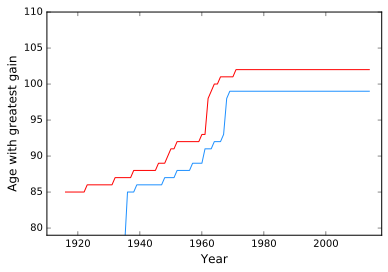

In [97]:
fig1d(lt)
fig1d(mlt)

plt.xlabel('Year', fontsize=12)
plt.ylabel('Age with greatest gain', fontsize=12)
plt.axis((1910,2018,79,110))
plt.show()

These are close, but not identical to what's in the paper. What I don't understand at the moment is that the Figure 1c is about a factor 2 out from what's in the paper (I had the same factor 2 in equivalent code in IDL, so either I misunderstood what they did, or they did something I missed) and despite the shape of 1d being about right, the exact transitions are not quite identical.

So what can we take away from this at the moment. Well, first, the drop off in the rate of change of survivors/100k occurs above an age of 102, which is above the age at which we have a complete series of data. In that case, the drop off is going to depend on how we deal with the missing data. Second, we see a plateau in Figure 1d too, at an age of 102 for females and 99 for males. These are the highest ages for each sex for which we have complete data. The plateau, in this case, only means that we've maxed out that data, not that we've maxed out survival improvements in very old people in France.

That's the first of the two strands of evidence that human lifespan may have a natural limit.

